In [1]:
# Imporing Modules

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# Imporing Data Files

df_Mobility_2020 = pd.read_csv('Data\\Mobility\\2020_US_Region_Mobility_Report.csv')
df_Mobility_2021 = pd.read_csv('Data\\Mobility\\2021_US_Region_Mobility_Report.csv')
df_Mobility_2022 = pd.read_csv('Data\\Mobility\\2022_US_Region_Mobility_Report.csv')

df_Mobility_Raw = pd.concat([df_Mobility_2020, df_Mobility_2021, df_Mobility_2022])

In [3]:
df_Mobility_FL = df_Mobility_Raw.loc[(df_Mobility_Raw['sub_region_1'] == "Florida")]
df_Mobility_FL = df_Mobility_FL.drop(['country_region_code', 'country_region', 'census_fips_code', 
                                      'place_id', 'sub_region_1', 'metro_area', 'iso_3166_2_code'], axis=1)

In [4]:
df_Mobility_FL = df_Mobility_FL.rename(columns={'sub_region_2': 'county',
                                                'retail_and_recreation_percent_change_from_baseline': 'RnR',
                                                'grocery_and_pharmacy_percent_change_from_baseline': 'GnP',
                                               'parks_percent_change_from_baseline': 'Parks',
                                               'transit_stations_percent_change_from_baseline': 'Stations',
                                               'workplaces_percent_change_from_baseline': 'Workplace',
                                               'residential_percent_change_from_baseline': 'Residential'})
df_Mobility_FL.head()

,county,date,RnR,GnP,Parks,Stations,Workplace,Residential
84469,NaN,2020-02-15,2.0,0.0,9.0,2.0,-1.0,-1.0
84470,NaN,2020-02-16,4.0,1.0,8.0,2.0,-2.0,0.0
84471,NaN,2020-02-17,5.0,1.0,24.0,0.0,-19.0,4.0
84472,NaN,2020-02-18,3.0,2.0,13.0,6.0,1.0,0.0
84473,NaN,2020-02-19,3.0,0.0,15.0,5.0,2.0,0.0


In [5]:
df_Mobility_FL['date'] = pd.to_datetime(df_Mobility_FL['date'])
df_Mobility_FL = df_Mobility_FL.dropna(subset='county').reset_index(drop=True)
df_Mobility_FL.fillna(0, inplace=True)

In [6]:
print(df_Mobility_FL)

                  county       date   RnR   GnP  Parks  Stations  Workplace  \
0         Alachua County 2020-02-15   3.0   2.0    4.0      -3.0        0.0   
1         Alachua County 2020-02-16   3.0  -1.0    3.0      -5.0       -3.0   
2         Alachua County 2020-02-17   2.0  -3.0   11.0       2.0      -16.0   
3         Alachua County 2020-02-18   2.0   0.0    9.0       4.0        2.0   
4         Alachua County 2020-02-19   0.0  -2.0   17.0       0.0        1.0   
...                  ...        ...   ...   ...    ...       ...        ...   
63132  Washington County 2022-10-11   5.0  13.0    0.0       0.0        9.0   
63133  Washington County 2022-10-12   3.0  18.0    0.0       0.0       10.0   
63134  Washington County 2022-10-13  14.0  24.0    0.0       0.0       13.0   
63135  Washington County 2022-10-14   9.0  11.0    0.0       0.0        8.0   
63136  Washington County 2022-10-15   4.0   0.0    0.0       0.0        5.0   

       Residential  
0             -1.0  
1        

In [7]:
df_Mobility_FL.groupby('county').count()

,date,RnR,GnP,Parks,Stations,Workplace,Residential
county,,,,,,,
Alachua County,974,974,974,974,974,974,974
Baker County,949,949,949,949,949,949,949
Bay County,974,974,974,974,974,974,974
Bradford County,949,949,949,949,949,949,949
Brevard County,974,974,974,974,974,974,974
...,...,...,...,...,...,...,...
Union County,693,693,693,693,693,693,693
Volusia County,974,974,974,974,974,974,974
Wakulla County,968,968,968,968,968,968,968


In [8]:
data = df_Mobility_FL

# Create a reference date range for the period of interest
date_range = pd.date_range(start='2020-02-15', end='2022-10-15', freq='D')

# Create a new DataFrame with the complete date range for each county
county_groups = data.groupby('county')
filled_data = pd.DataFrame()
for county, group in county_groups:
    county_dates = pd.DataFrame({'date': date_range})
    county_dates['county'] = county
    county_dates = pd.merge(county_dates, group, how='outer', on=['county', 'date'])
    filled_data = pd.concat([filled_data, county_dates])

# Set the index to the date column
filled_data = filled_data.set_index('date')

# Perform linear interpolation to fill missing values
filled_data = filled_data.groupby('county').apply(lambda group: group.interpolate(method='linear'))

# Reset the index to include the date column as a regular column
filled_data = filled_data.reset_index()

# Print the filled data
print(filled_data)

            date             county   RnR   GnP  Parks  Stations  Workplace  \
0     2020-02-15     Alachua County   3.0   2.0    4.0      -3.0        0.0   
1     2020-02-16     Alachua County   3.0  -1.0    3.0      -5.0       -3.0   
2     2020-02-17     Alachua County   2.0  -3.0   11.0       2.0      -16.0   
3     2020-02-18     Alachua County   2.0   0.0    9.0       4.0        2.0   
4     2020-02-19     Alachua County   0.0  -2.0   17.0       0.0        1.0   
...          ...                ...   ...   ...    ...       ...        ...   
65253 2022-10-11  Washington County   5.0  13.0    0.0       0.0        9.0   
65254 2022-10-12  Washington County   3.0  18.0    0.0       0.0       10.0   
65255 2022-10-13  Washington County  14.0  24.0    0.0       0.0       13.0   
65256 2022-10-14  Washington County   9.0  11.0    0.0       0.0        8.0   
65257 2022-10-15  Washington County   4.0   0.0    0.0       0.0        5.0   

       Residential  
0             -1.0  
1        

In [9]:
#Test
print(filled_data.groupby('county').count())

                   date  RnR  GnP  Parks  Stations  Workplace  Residential
county                                                                    
Alachua County      974  974  974    974       974        974          974
Baker County        974  974  974    974       974        974          974
Bay County          974  974  974    974       974        974          974
Bradford County     974  974  974    974       974        974          974
Brevard County      974  974  974    974       974        974          974
...                 ...  ...  ...    ...       ...        ...          ...
Union County        974  974  974    974       974        974          974
Volusia County      974  974  974    974       974        974          974
Wakulla County      974  974  974    974       974        974          974
Walton County       974  974  974    974       974        974          974
Washington County   974  974  974    974       974        974          974

[67 rows x 7 columns]


In [10]:
# Import Infection Data (Florida State)
df_infection_FL = pd.read_csv(r'Data\Infection\us-states.csv')
df_infection_FL = df_infection_FL.loc[df_infection_FL['state'] == 'Florida']
df_infection_FL['date'] = pd.to_datetime(df_infection_FL['date'])
df_infection_FL = df_infection_FL.reset_index(drop=True)

df_infection_FL.head()

,date,state,fips,cases,deaths
0,2020-03-01,Florida,12,2,0
1,2020-03-02,Florida,12,2,0
2,2020-03-03,Florida,12,3,0
3,2020-03-04,Florida,12,3,0
4,2020-03-05,Florida,12,4,0


In [11]:
# Calculate 14 Day Average (Florida State)

# calculate the daily infections data for Florida State
df_infection_FL['daily_cases'] = df_infection_FL['cases'].diff().abs()
df_infection_FL['7_day_avg_inf'] = df_infection_FL['daily_cases'].rolling(window=7).mean()

print(df_infection_FL)

           date    state  fips    cases  deaths  daily_cases  7_day_avg_inf
0    2020-03-01  Florida    12        2       0          NaN            NaN
1    2020-03-02  Florida    12        2       0          0.0            NaN
2    2020-03-03  Florida    12        3       0          1.0            NaN
3    2020-03-04  Florida    12        3       0          0.0            NaN
4    2020-03-05  Florida    12        4       0          1.0            NaN
...         ...      ...   ...      ...     ...          ...            ...
1090 2023-02-24  Florida    12  7473371   86294          0.0            0.0
1091 2023-02-25  Florida    12  7473371   86294          0.0            0.0
1092 2023-02-26  Florida    12  7473371   86294          0.0            0.0
1093 2023-02-27  Florida    12  7473371   86294          0.0            0.0
1094 2023-02-28  Florida    12  7473371   86294          0.0            0.0

[1095 rows x 7 columns]


In [12]:
# Set the 'Date' column as the index of the dataframe
df_infection_FL.set_index('date', inplace=True)

# Select the rows within the desired date range
start_date = '2020-03-01'
end_date = '2022-02-28'
filtered_df_inf = df_infection_FL.loc[start_date:end_date]

# Reset the index of the filtered dataframe to the default index
filtered_df_inf.reset_index(inplace=True)
df_infection_FL.reset_index(inplace=True)

# Print the filtered dataframe
print(filtered_df_inf)

          date    state  fips    cases  deaths  daily_cases  7_day_avg_inf
0   2020-03-01  Florida    12        2       0          NaN            NaN
1   2020-03-02  Florida    12        2       0          0.0            NaN
2   2020-03-03  Florida    12        3       0          1.0            NaN
3   2020-03-04  Florida    12        3       0          0.0            NaN
4   2020-03-05  Florida    12        4       0          1.0            NaN
..         ...      ...   ...      ...     ...          ...            ...
725 2022-02-24  Florida    12  5797657   69553       3401.0    3963.000000
726 2022-02-25  Florida    12  5800599   69790       2942.0    3622.571429
727 2022-02-26  Florida    12  5803337   69790       2738.0    3236.428571
728 2022-02-27  Florida    12  5803337   69790          0.0    3236.428571
729 2022-02-28  Florida    12  5806510   70084       3173.0    3689.714286

[730 rows x 7 columns]


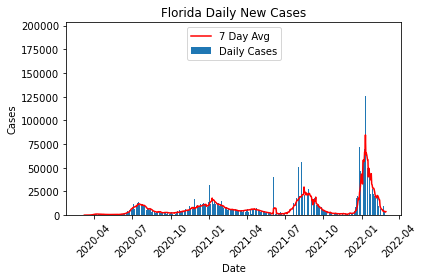

In [13]:
# Plot Daily Cases and 7 Day Avg for Florida State
plt.bar(filtered_df_inf['date'], filtered_df_inf['daily_cases'], label='Daily Cases')
plt.plot(filtered_df_inf['date'], filtered_df_inf['7_day_avg_inf'], label='7 Day Avg', color='red')
plt.title("Florida Daily New Cases")
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cases')
plt.tight_layout()
filename = os.path.join('Figure/Avg', 'FL_daily_7_day_avg_inf' + '.jpeg')
plt.savefig(filename, dpi=400)
plt.show()

In [14]:
print(filled_data)

            date             county   RnR   GnP  Parks  Stations  Workplace  \
0     2020-02-15     Alachua County   3.0   2.0    4.0      -3.0        0.0   
1     2020-02-16     Alachua County   3.0  -1.0    3.0      -5.0       -3.0   
2     2020-02-17     Alachua County   2.0  -3.0   11.0       2.0      -16.0   
3     2020-02-18     Alachua County   2.0   0.0    9.0       4.0        2.0   
4     2020-02-19     Alachua County   0.0  -2.0   17.0       0.0        1.0   
...          ...                ...   ...   ...    ...       ...        ...   
65253 2022-10-11  Washington County   5.0  13.0    0.0       0.0        9.0   
65254 2022-10-12  Washington County   3.0  18.0    0.0       0.0       10.0   
65255 2022-10-13  Washington County  14.0  24.0    0.0       0.0       13.0   
65256 2022-10-14  Washington County   9.0  11.0    0.0       0.0        8.0   
65257 2022-10-15  Washington County   4.0   0.0    0.0       0.0        5.0   

       Residential  
0             -1.0  
1        

In [15]:
daily_mob_data_FL = filled_data.groupby('date').mean().reset_index()

print(daily_mob_data_FL)

          date       RnR       GnP      Parks  Stations  Workplace  \
0   2020-02-15  7.303030  2.030303  12.106061  5.666667  -0.348485   
1   2020-02-16  4.530303 -0.727273   4.303030  3.106061  -2.015152   
2   2020-02-17  4.567164 -0.358209  13.492537  4.059701 -17.656716   
3   2020-02-18  2.865672  1.156716   7.835821  4.820896   1.268657   
4   2020-02-19  3.059701  1.014925   9.208955  3.641791   1.298507   
..         ...       ...       ...        ...       ...        ...   
969 2022-10-11 -5.059701  2.298507  -1.492537 -4.716418 -13.191898   
970 2022-10-12 -4.328358  1.402985  -3.283582 -5.507463 -13.134328   
971 2022-10-13 -3.537313  2.970149  -3.328358 -3.925373 -13.298507   
972 2022-10-14 -4.462687  3.059701  -0.029851 -7.313433 -14.223881   
973 2022-10-15 -4.268657  2.492537   3.268657 -4.238806  -9.597015   

     Residential  
0      -0.348485  
1       0.045455  
2       2.417910  
3       0.000000  
4      -0.044776  
..           ...  
969     2.477612  
970    

In [16]:
daily_mob_data_FL['RnR_Avg'] = daily_mob_data_FL['RnR'].rolling(window=7).mean()
daily_mob_data_FL['GnP_Avg'] = daily_mob_data_FL['GnP'].rolling(window=7).mean()
daily_mob_data_FL['Parks_Avg'] = daily_mob_data_FL['Parks'].rolling(window=7).mean()
daily_mob_data_FL['Stations_Avg'] = daily_mob_data_FL['Stations'].rolling(window=7).mean()
daily_mob_data_FL['Workplace_Avg'] = daily_mob_data_FL['Workplace'].rolling(window=7).mean()
daily_mob_data_FL['Residential_Avg'] = daily_mob_data_FL['Residential'].rolling(window=7).mean()
print(daily_mob_data_FL)

          date       RnR       GnP      Parks  Stations  Workplace  \
0   2020-02-15  7.303030  2.030303  12.106061  5.666667  -0.348485   
1   2020-02-16  4.530303 -0.727273   4.303030  3.106061  -2.015152   
2   2020-02-17  4.567164 -0.358209  13.492537  4.059701 -17.656716   
3   2020-02-18  2.865672  1.156716   7.835821  4.820896   1.268657   
4   2020-02-19  3.059701  1.014925   9.208955  3.641791   1.298507   
..         ...       ...       ...        ...       ...        ...   
969 2022-10-11 -5.059701  2.298507  -1.492537 -4.716418 -13.191898   
970 2022-10-12 -4.328358  1.402985  -3.283582 -5.507463 -13.134328   
971 2022-10-13 -3.537313  2.970149  -3.328358 -3.925373 -13.298507   
972 2022-10-14 -4.462687  3.059701  -0.029851 -7.313433 -14.223881   
973 2022-10-15 -4.268657  2.492537   3.268657 -4.238806  -9.597015   

     Residential   RnR_Avg   GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0      -0.348485       NaN       NaN        NaN           NaN            NaN   

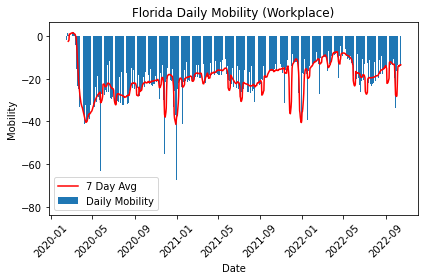

In [20]:
# Plot Daily Cases and 7 Day Avg for Florida State
plt.bar(daily_mob_data_FL['date'], daily_mob_data_FL['Workplace'], label='Daily Mobility')
plt.plot(daily_mob_data_FL['date'], daily_mob_data_FL['Workplace_Avg'], label='7 Day Avg', color='red')
plt.title("Florida Daily Mobility (Workplace)")
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Mobility')
plt.tight_layout()
filename = os.path.join('Figure/Avg', 'FL_daily_7_day_avg_mob_Work' + '.jpeg')
plt.savefig(filename, dpi=400)
plt.show()

In [21]:
# Set the 'Date' column as the index of the dataframe
daily_mob_data_FL.set_index('date', inplace=True)

# Select the rows within the desired date range
start_date = '2020-03-01'
end_date = '2022-02-28'
filtered_df = daily_mob_data_FL.loc[start_date:end_date]

# Reset the index of the filtered dataframe to the default index
filtered_df.reset_index(inplace=True)
daily_mob_data_FL.reset_index(inplace=True)

# Print the filtered dataframe
print(filtered_df)


          date        RnR       GnP      Parks  Stations  Workplace  \
0   2020-03-01  12.910448  7.231343  11.134328  7.955224   1.298507   
1   2020-03-02   8.746269  6.253731   5.701493  3.119403   2.305970   
2   2020-03-03  11.179104  9.753731   7.373134  3.641791   2.044776   
3   2020-03-04   8.432836  6.940299   6.791045  2.850746   1.477612   
4   2020-03-05   7.776119  5.701493   1.835821  3.417910   0.626866   
..         ...        ...       ...        ...       ...        ...   
725 2022-02-24   3.373134  5.597015  12.880597 -0.970149 -10.469083   
726 2022-02-25   0.164179  3.895522  11.522388 -2.955224 -10.266525   
727 2022-02-26   2.895522  3.865672  18.044776 -2.761194  -7.165956   
728 2022-02-27   4.402985  4.417910  17.477612 -1.902985  -9.632552   
729 2022-02-28   0.358209  3.522388   0.417910 -2.059701 -10.591684   

     Residential    RnR_Avg   GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0      -0.611940   8.164179  3.650320   2.773987      5.049041    

In [48]:
print(filtered_df)

          date        RnR       GnP      Parks  Stations  Workplace  \
0   2020-03-01  12.910448  7.231343  11.134328  7.955224   1.298507   
1   2020-03-02   8.746269  6.253731   5.701493  3.119403   2.305970   
2   2020-03-03  11.179104  9.753731   7.373134  3.641791   2.044776   
3   2020-03-04   8.432836  6.940299   6.791045  2.850746   1.477612   
4   2020-03-05   7.776119  5.701493   1.835821  3.417910   0.626866   
..         ...        ...       ...        ...       ...        ...   
725 2022-02-24   3.373134  5.597015  12.880597 -0.970149 -10.469083   
726 2022-02-25   0.164179  3.895522  11.522388 -2.955224 -10.266525   
727 2022-02-26   2.895522  3.865672  18.044776 -2.761194  -7.165956   
728 2022-02-27   4.402985  4.417910  17.477612 -1.902985  -9.632552   
729 2022-02-28   0.358209  3.522388   0.417910 -2.059701 -10.591684   

     Residential    RnR_Avg   GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0      -0.611940   8.164179  3.650320   2.773987      5.049041    

In [22]:
processed_data = pd.merge(filtered_df, filtered_df_inf, on=['date'])
processed_data = processed_data.drop(['GnP', 'RnR', 'Parks', 
                                      'Stations', 'Workplace', 'Residential', 'state', 'fips', 'cases', 'deaths', 'daily_cases'], axis=1)

In [23]:
print(processed_data)

          date    RnR_Avg   GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0   2020-03-01   8.164179  3.650320   2.773987      5.049041       1.388593   
1   2020-03-02   8.938166  4.430704   2.631130      5.228145       1.387527   
2   2020-03-03  10.147122  5.884861   3.759062      5.302772       1.498934   
3   2020-03-04  10.347548  6.652452   5.889126      5.202559       1.607676   
4   2020-03-05   9.701493  6.569296   5.782516      4.867804       1.511727   
..         ...        ...       ...        ...           ...            ...   
725 2022-02-24   1.965885  4.383795  12.895522     -1.976546     -12.901310   
726 2022-02-25   2.138593  4.503198  13.422175     -1.840085     -12.531221   
727 2022-02-26   2.379531  4.513859  14.767591     -1.567164     -12.430602   
728 2022-02-27   2.422175  4.586354  14.498934     -1.446695     -12.208194   
729 2022-02-28   2.042644  4.479744  12.106610     -1.636461      -9.871459   

     Residential_Avg  7_day_avg_inf  
0          -0

In [24]:
# Set the 'Date' column as the index of the dataframe
processed_data.set_index('date', inplace=True)

# Select the rows within the desired date range
start_date = '2020-03-15'
end_date = '2022-02-28'
filtered_df = processed_data.loc[start_date:end_date]

# Reset the index of the filtered dataframe to the default index
filtered_df.reset_index(inplace=True)
processed_data.reset_index(inplace=True)

# Print the filtered dataframe
print(filtered_df)

          date   RnR_Avg    GnP_Avg  Parks_Avg  Stations_Avg  Workplace_Avg  \
0   2020-03-15  6.646055  12.858706  13.023454      2.697228      -0.756574   
1   2020-03-16  5.731343  14.488699  12.844350      1.750533      -3.125800   
2   2020-03-17  3.912580  15.909168  12.294243      0.646055      -5.865672   
3   2020-03-18  1.191898  16.473348  11.068230     -0.968017      -9.059701   
4   2020-03-19 -2.381663  15.901919   9.417910     -3.044776     -12.392324   
..         ...       ...        ...        ...           ...            ...   
711 2022-02-24  1.965885   4.383795  12.895522     -1.976546     -12.901310   
712 2022-02-25  2.138593   4.503198  13.422175     -1.840085     -12.531221   
713 2022-02-26  2.379531   4.513859  14.767591     -1.567164     -12.430602   
714 2022-02-27  2.422175   4.586354  14.498934     -1.446695     -12.208194   
715 2022-02-28  2.042644   4.479744  12.106610     -1.636461      -9.871459   

     Residential_Avg  7_day_avg_inf  
0           0

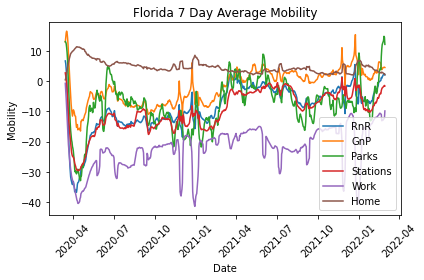

In [26]:
# Plot Daily Cases and 7 Day Avg for Florida State
plt.plot(filtered_df['date'], filtered_df['RnR_Avg'], label='RnR')
plt.plot(filtered_df['date'], filtered_df['GnP_Avg'], label='GnP')
plt.plot(filtered_df['date'], filtered_df['Parks_Avg'], label='Parks')
plt.plot(filtered_df['date'], filtered_df['Stations_Avg'], label='Stations')
plt.plot(filtered_df['date'], filtered_df['Workplace_Avg'], label='Work')
plt.plot(filtered_df['date'], filtered_df['Residential_Avg'], label='Home')
plt.title("Florida 7 Day Average Mobility")
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Mobility')
plt.tight_layout()
filename = os.path.join('Figure/Avg', 'FL_daily_7_day_avg_mob_filter' + '.jpeg')
plt.savefig(filename, dpi=400)
plt.show()

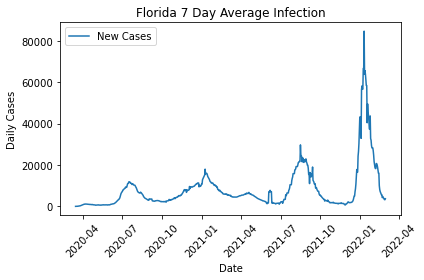

In [28]:
# Plot Daily Cases and 7 Day Avg for Florida State
plt.plot(filtered_df['date'], filtered_df['7_day_avg_inf'], label='New Cases')
plt.title("Florida 7 Day Average Infection")
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Cases')
plt.tight_layout()
filename = os.path.join('Figure/Avg', 'FL_daily_7_day_avg_inf_filter' + '.jpeg')
plt.savefig(filename, dpi=400)
plt.show()

In [50]:
# Save data
filtered_df.to_csv('processed_data.csv', index=False)